###  For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('Elon_musk.csv',encoding='Latin-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
data =[Text.strip() for Text in data.Text]   # remove the both leading and the trainig charecter
data = [Text for Text in data if Text]       # remove empty string, because the are considered in python as false
data[0:15]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler']

In [5]:
data1=' '.join(data)
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
# Remove Punctuations 
no_punc_text=data1.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [7]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [8]:
# stopword

import nltk
from nltk.corpus import stopwords

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Solan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url_text)
print(text_tokens[0:50])
len(text_tokens)

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was']


20423

In [10]:
# Remove stopword 
import nltk
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Solan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Normalize the data
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [12]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['won\x92t', 'give', 'privat', 'key', 'avoid', 'cost', 'freewalletorg', 'your', 'app', 'suck', 'rt', 'spacex', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'ajtourvil', 'blkmdl3', 'rationaletienn', 'adamklotz', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'rationaletienn', 'adamklotz', 'starlink', 'staggeringli', 'difficult', 'technic', 'amp', 'econom', 'endeavor', 'howev', 'rationaletienn', 'adamklotz', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'adamklotz', 'it\x92', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'amp', 'ship', 'tobyliiiiiiiiii', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'cryptoshrikar', 'coindesk', 'tesla', 'danzpalm', 'u0001f923u0001f923', 'xprize', 'team', 'manag', '100m']


In [13]:
# join the data agin for Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)


kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power freewalletorg any crypto wallet wont give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville blkmdl3 rationaletienne adamklotz once predict cash fl

In [14]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyew', 'geoffkeighley', 'unrealengine', 'it\x92s', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true', '

In [21]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyew geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville blkmdl3 rationaletienne adamklotz once predict cash flow reasonably well sta

### feature extraction 

In [22]:
# feature extraction 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)
x

<14890x4292 sparse matrix of type '<class 'numpy.int64'>'
	with 14682 stored elements in Compressed Sparse Row format>

In [23]:
print(vectorizer.get_feature_names()[40:90])

['2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430']


In [47]:
print(vectorizer.vocabulary_)

{'kunalb11': 2047, 'alien': 229, 'idaacarmack': 1785, 'ray': 2951, 'trace': 3824, 'cyberpunk': 961, 'hdr': 1672, 'nextlevel': 2491, 'have': 1666, 'try': 3858, 'joerogan': 1966, 'spotify': 3449, 'great': 1605, 'interview': 1894, 'gtera27': 1624, 'doge': 1113, 'underestimate': 3987, 'teslacn': 3670, 'congratulation': 854, 'tesla': 3664, 'china': 739, 'amazing': 254, 'execution': 1324, 'last': 2065, 'year': 4258, 'now': 2531, 'next': 2490, 'even': 1294, 'happy': 1653, 'new': 2487, 'ox': 2648, 'frodo': 1489, 'underdoge': 3986, 'all': 231, 'thought': 3749, 'would': 4234, 'fail': 1360, 'himself': 1718, 'owenspark': 2645, 'flcnhvy': 1432, 'anonyx10': 283, 'haha': 1639, 'thanks': 3708, 'indeed': 1834, 'tweet': 3877, 'definitely': 1015, 'represent': 3035, 'realworld': 2976, 'time': 3767, 'allocation': 233, 'the': 3715, 'entertaining': 1251, 'outcome': 2625, 'likely': 2125, 'givedirectly': 1574, 'just': 1994, 'send': 3219, 'agree': 200, 'clubhouse': 780, 'kanyew': 2003, 'geoffkeighley': 1553, 'u

In [48]:
print(x.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [49]:
print(x.toarray().shape)

(14890, 4292)


###  Generate wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS

In [28]:
# define a function to plot word cloud

In [29]:
def plot_cloud(wordcloud):
    # set fig size
    plt.figure(figsize = (40,30))
    # display image
    plt.imshow(wordcloud)
    # no axis details
    plt.axis('off');

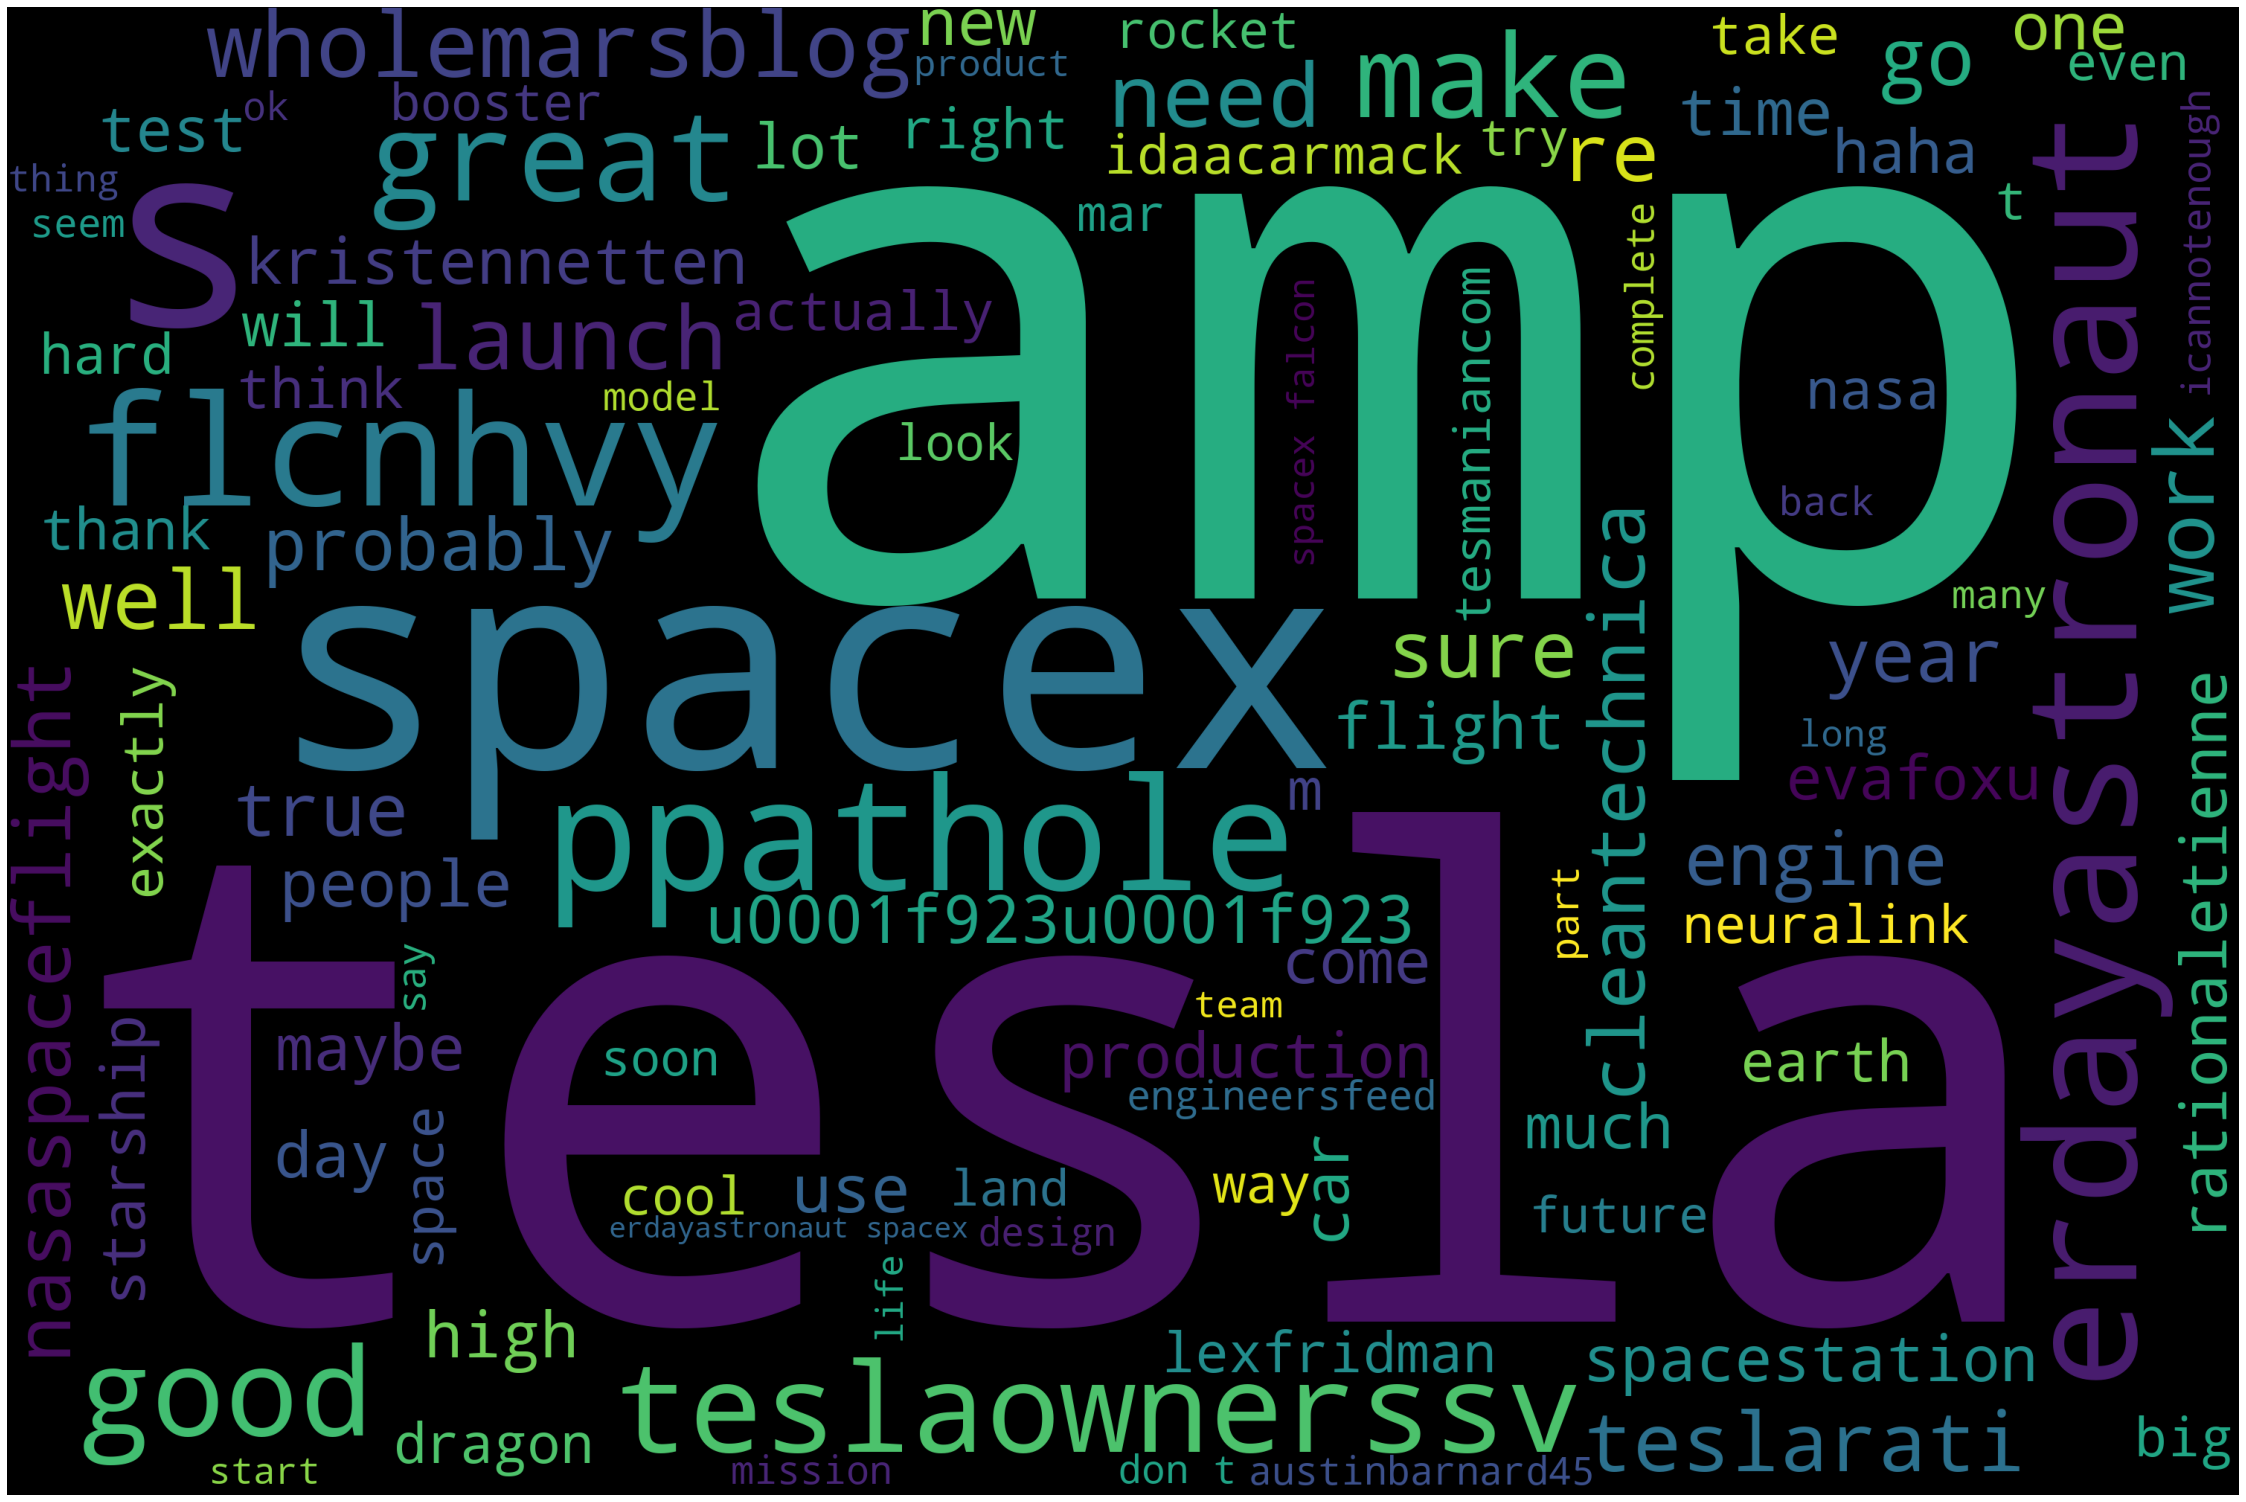

In [30]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color ='black', max_words = 100,stopwords=stopwords).generate(clean_tweets)
plot_cloud(wordcloud)

###  Name Entity Recognition

In [33]:
# part of speech tagging
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block =nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent', jupyter = True)

In [34]:
for token in doc_block[100:200]:
    print(token, token.pos_)

wont NOUN
give VERB
private ADJ
key NOUN
avoid NOUN
cost NOUN
freewalletorg NUM
your PRON
app NOUN
suck NOUN
rt PROPN
spacex VERB
nasa PROPN
select PROPN
falcon PROPN
heavy ADJ
launch NOUN
first ADV
two NUM
element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
ajtourville PROPN
blkmdl3 NOUN
rationaletienne PROPN
adamklotz PROPN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo PROPN
rationaletienne PROPN
adamklotz NOUN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
amp NOUN
economic ADJ
endeavor NOUN
however ADV
rationaletienne PROPN
adamklotz NOUN
spacex AUX
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
idaacarmack NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g NOUN
adamklotz NOUN
its NOUN
mean ADJ
price NOUN
country NOUN
only ADV
difference NOUN
taxis VERB
amp NOUN
shipping NOUN
tobyliiiiiii

In [35]:
# filtering for nouns and verbs only
noun_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verbs)

['ray', 'trace', 'cyberpunk', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'haha', 'represent', 'time', 'allocation', 'outcome', 'send', 'clubhouse', 'get', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'issue', 'sentencing', 'seem', 'thank', 'fix', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'power', 'freewalletorg', 'wallet', 'won\x92t', 'give', 'key', 'avoid', 'cost', 'app', 'suck', 'spacex', 'launch', 'element', 'gateway', 'mission', 'blkmdl3', 'predict', 'cash', 'flow', 'starlink', 'adamklotz', 'starlink', 'amp', 'endeavor', 'adamklotz', 'pass', 'chasm', 'cash', 'flow', 'year', 'idaacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'g', 'adamklotz', 'it\x92s', 'price', 'country', 'difference', 'taxis', 'amp', 'shipping', 'tobyliiiiiiiiii', 'earth', 'idea', 'apply', 'tesla', 'danzpalmer', 'xprize', 'team', 'manage', 'm', 'carbon', 'capture

In [36]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['receive', 'stock', 'comp', 'stockoption', 'take', 'table', 'miss', 'work', 'go', 'capybarasurfer', 'seem', 'bit', 'itsallrisky', 'appear', 'fix', 'coin', 'unit', 'time', 'kevinmgill', 'michaelhodapp', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'amp', 'booster', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'lexfridman', 'cute', 'image', 'doesn\x92t', 'reflect', 'time', 'cost', 'people', 'rain', 'amp', 'pain', 'u0001f3b6', 'let', 'come', 'simplicity', 'genius', 'astrogdogg', 'spacex', 'yup', 'jbuttermost', 'dogecoinrich', 'wapodavenport', 'dogecoinrich', 'astrojordy', 'decade', 'work', 'look', 'note', 'email', 'text', 'astrojordy', 'lesson', 'earth', 'time', 'tell', 'story', 'tesla', 'amp', 'spacex', 'theonion', 'read', 'it\x92s', 'kingdom', 'dumdin7', 'hear', 'name', 'year', 'dogecake', 'yolt', 'kristennetten', 'owenspark', 'thing', 'restaurant', 'get', 'hang', 'stranger', 'sjm', 'currency', 'earth', 'redlineshifter', 'scratch', 'wondero

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# countin tokens again
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x:x[1], reverse = True)
wf_df = pd.DataFrame(word_freq)
wf_df.columns = ['word','count']
wf_df[100:200]

,word,count
100,play,11
101,pressure,11
102,today,11
103,tomorrow,11
104,tesmaniancom,11
...,...,...
195,slashdot,7
196,adamklotz,6
197,pass,6
198,price,6


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

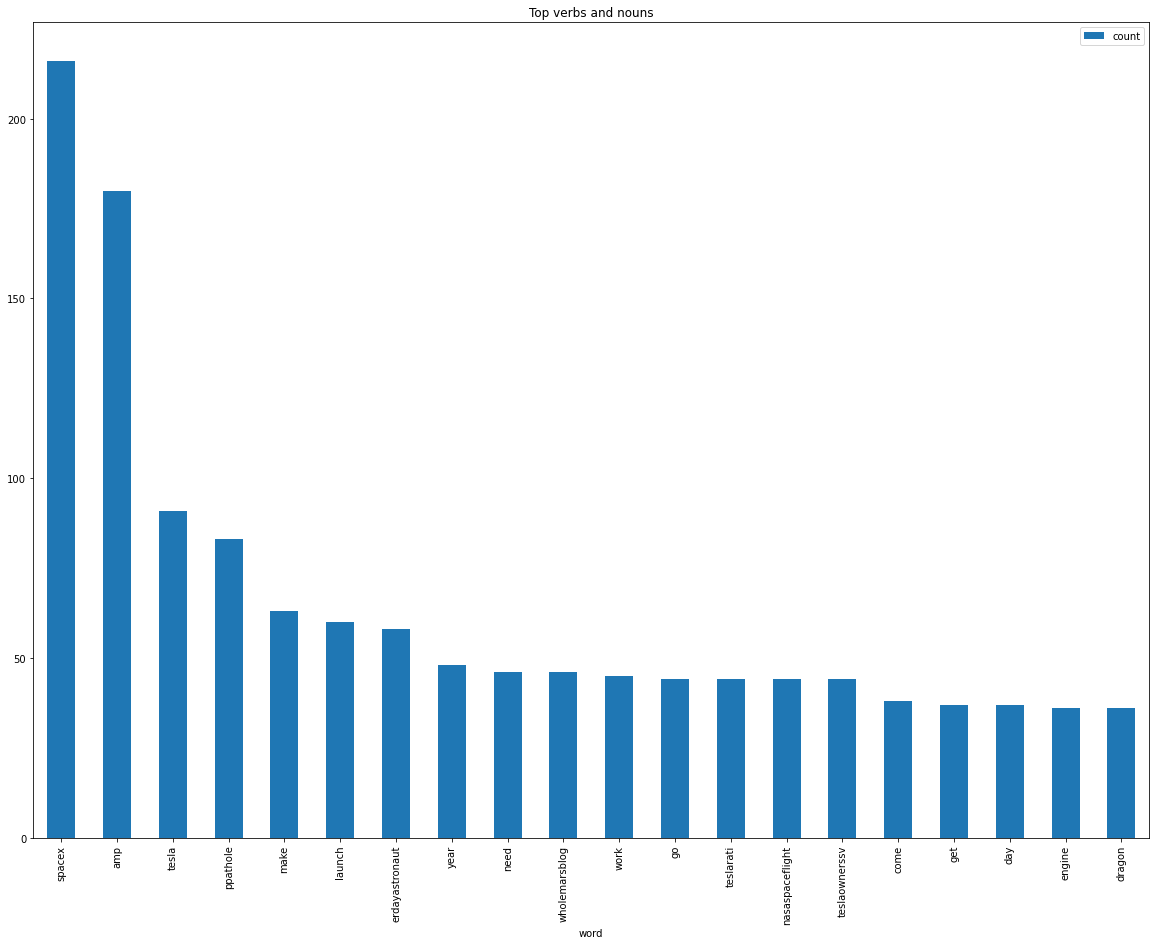

In [45]:
# Visualizing results
wf_df[0:20].plot.bar(x='word', figsize = (20,15), title = 'Top verbs and nouns')

##  Emotion Mining - Sentiment Analysis

In [50]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [51]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [53]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [54]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [55]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [56]:
# manual testing : test that is work
calculate_sentiment(text='great')

3

In [57]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [58]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [59]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
719,We just havent observed the https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [60]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.345238
std        2.684749
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [61]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [62]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [63]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


C:\Users\Solan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

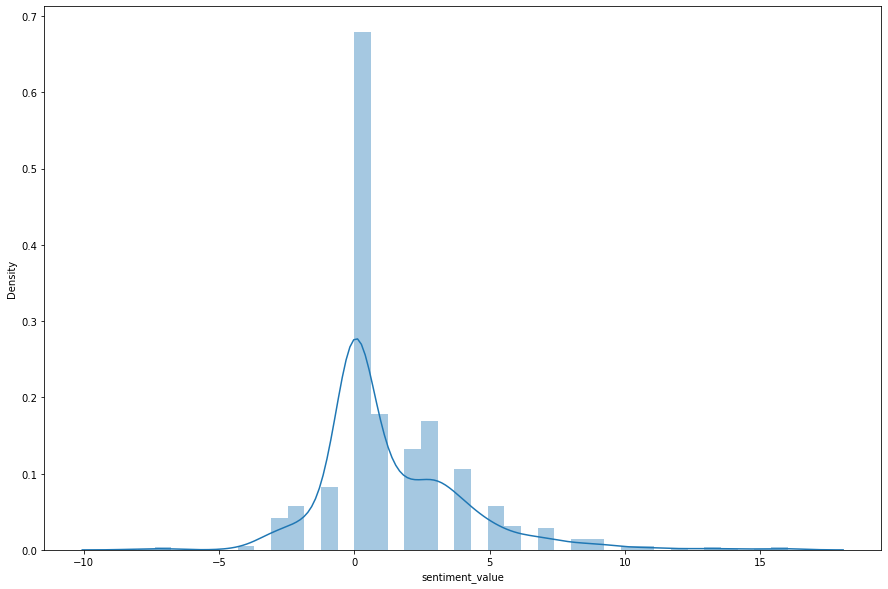

In [64]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

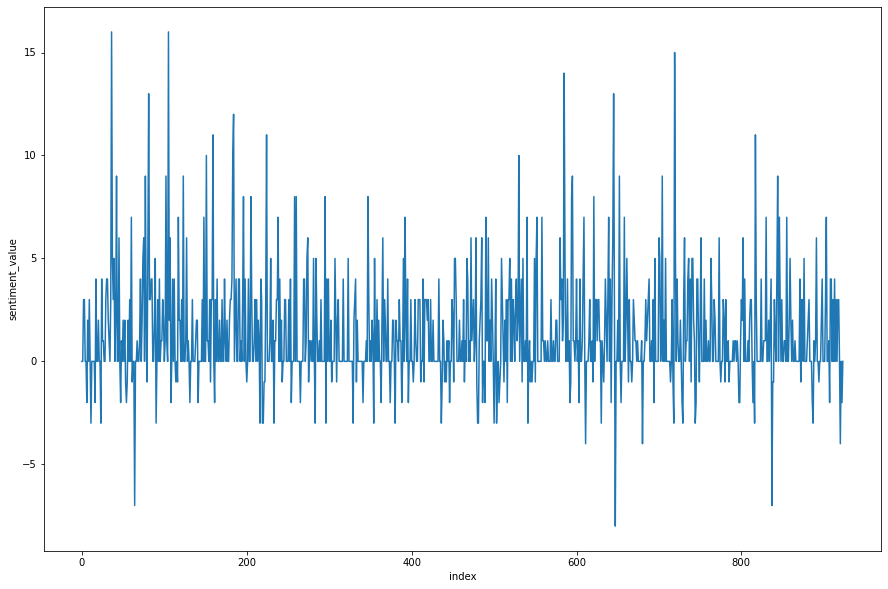

In [65]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

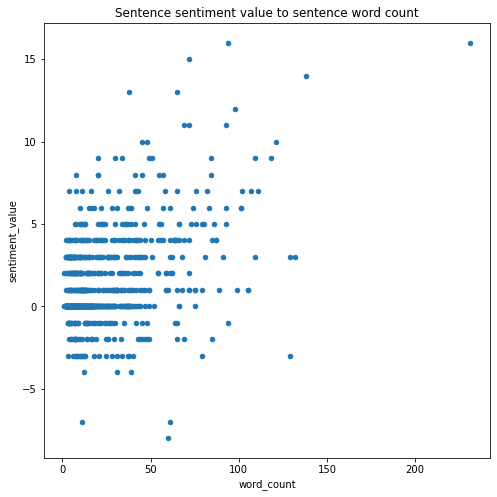

In [66]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')